<a href="https://colab.research.google.com/github/harnalashok/LLMs/blob/main/top_p_and_top_k_experiment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Ref: https://www.linkedin.com/pulse/your-first-llm-experiment-vishal-mysore-j55ec/
# https://www.linkedin.com/pulse/science-control-how-temperature-topp-topk-shape-large-puente-viejo-u88yf/




 Let’s imagine we have the following sentence:

- Yesterday I went to the cinema to see a ___

The idea is to predict the next word. The neural network will determine a probability for each of the words in the dictionary, in this case, we will use only 5 to simplify the process.

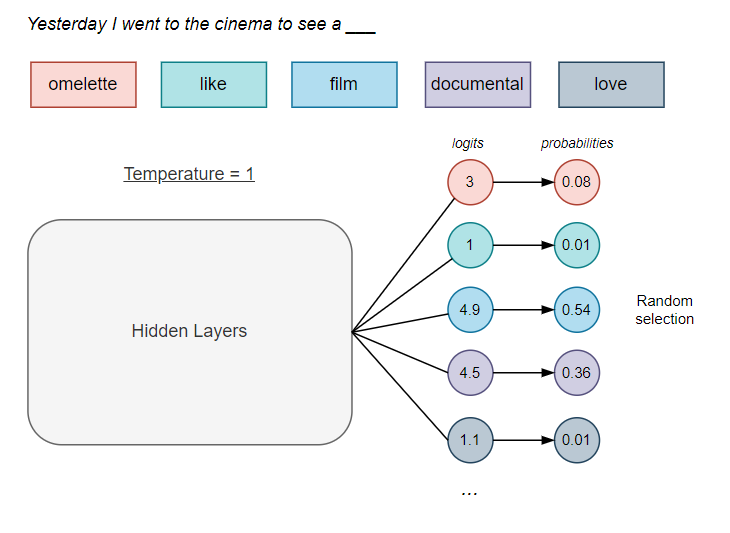

From the probabilities generated, randomness will be responsible for determining the word that follows. As can be seen, in the example above, normal softmax (temperature = 1) has been applied. In the following, we will see the result in the case of extreme values of these hyperparameters.

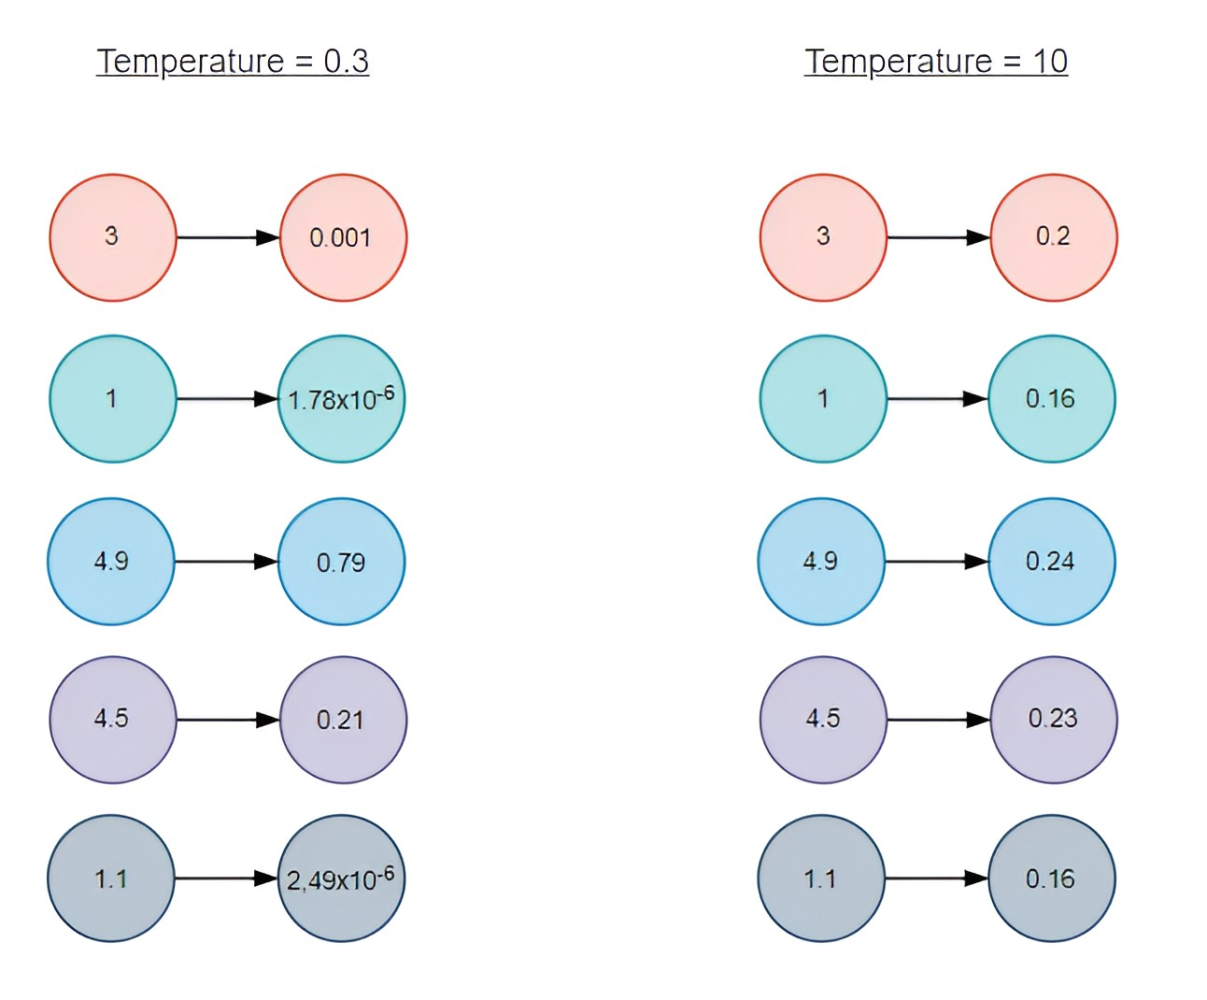

As temperature values approach 0 the higher probabilities increase further, making selection much more likely. Conversely, when the temperature gets much higher, the probabilities are softened, making more unexpected words more likely to be selected.

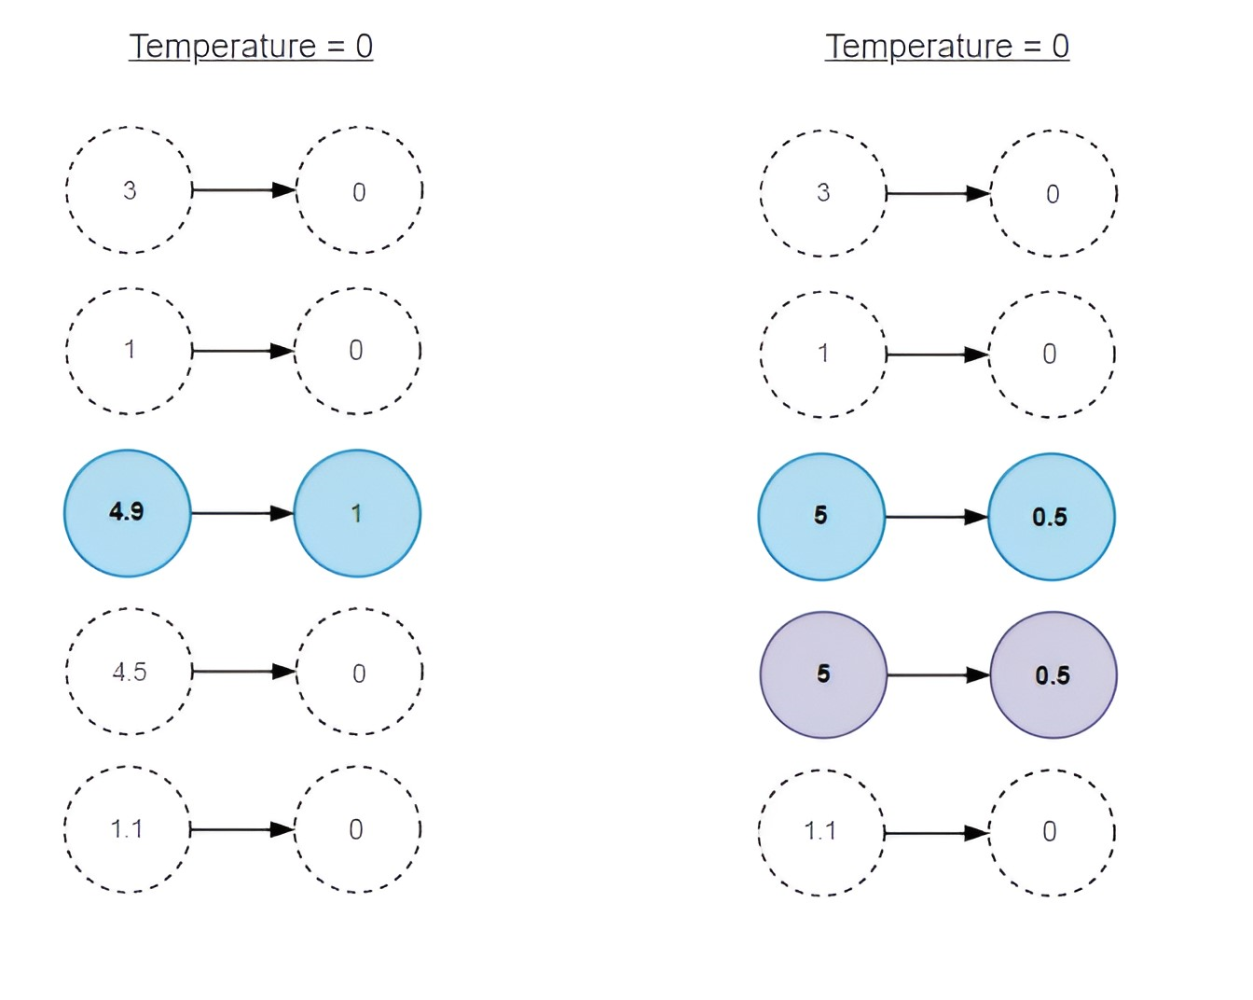

Let us pay attention to the 3 arguments temperature, top_k and top_p

> **Temperature** (temperature=0.7):The temperature parameter controls the randomness of the generated text. A higher temperature (e.g., closer to 1.0) makes the output more diverse and creative but potentially less focused. A lower temperature (e.g., closer to 0.0) makes the output more deterministic and focused, but it might be repetitive. In this case, temperature=0.7 indicates a moderate level of randomness.     

>**Top-k** Sampling (top_k=50):Top-k sampling limits the vocabulary used during text generation to the top-k most likely tokens. It helps control the diversity of the generated text. The model selects from the top-k tokens based on their predicted probabilities. Setting top_k=50 means that, during sampling, the model will consider the top 50 most likely tokens.     

>**Top-p** (Nucleus) Sampling (top_p=0.95):Top-p, also known as nucleus sampling, is an alternative to top-k sampling. It selects tokens based on their cumulative probabilities until the cumulative probability exceeds a specified threshold (top-p). Setting top_p=0.95 means that the model will consider tokens until the cumulative probability reaches 95%, ensuring a dynamic set of tokens based on their probabilities.

 Now lets look at other argument which is do_sample .

> do_sample=True:When do_sample is set to True, the model uses sampling during text generation. Instead of deterministically choosing the token with the highest probability at each step, the model stochastically samples from the probability distribution over the vocabulary. Sampling introduces randomness and diversity into the generated text. It allows the model to produce more creative and varied outputs.

> do_sample=False:When do_sample is set to False, the model uses greedy decoding. It selects the token with the highest probability at each step, leading to a more deterministic and focused generation. Greedy decoding tends to produce more predictable and conservative outputs.


In [1]:
!pip install accelerate --quiet

In [2]:
import torch
from transformers import pipeline

In [3]:
! pip install -i https://pypi.org/simple/ bitsandbytes --quiet

In [19]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    #bnb_4bit_quant_type="nf4",
    #bnb_4bit_use_double_quant=True,
)

In [20]:
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v0.6"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
        model_name,
        #load_in_4bit=True,
        quantization_config=bnb_config,
        torch_dtype=torch.bfloat16,
        device_map="auto",
        trust_remote_code=True,
    )

In [21]:
pipe = pipeline("text-generation",
                model= model,  # "TinyLlama/TinyLlama-1.1B-Chat-v0.6",
                tokenizer = tokenizer,
                torch_dtype=torch.bfloat16
                )

In [22]:
messages = [
            {
                "role": "system",
                "content": "You are my personal chef experienced in Indian spicy food",
            },
            {"role": "user",
                 "content": "What should i eat for breakfast today?"
            },
]

In [23]:
prompt = pipe.tokenizer.apply_chat_template(messages,
                                            tokenize=False,
                                            add_generation_prompt=True
                                            )

In [24]:
%%time

outputs = pipe(prompt,
               max_new_tokens=256,
               do_sample=True,
               temperature=0.7, # Default 0.8. Decrease makes it less creative
               top_k=50,        # A higher value (100) will give more diverse answers
               top_p=0.95       # A higher value leads to more diverse text
               )    # 7minutes


CPU times: user 11.4 s, sys: 26.4 ms, total: 11.4 s
Wall time: 11.6 s


In [25]:
print(outputs[0]["generated_text"])

<|system|>
You are my personal chef experienced in Indian spicy food</s>
<|user|>
What should i eat for breakfast today?</s>
<|assistant|>
To start your day off right, here are some breakfast ideas:

1. Eggs Benedict with toast
2. Smoothie bowl with Greek yogurt, berries, and granola
3. Muesli with mixed nuts and dried fruit
4. Cinnamon and nut butter pancakes
5. Sweet potato and black bean omelet
6. Quinoa and avocado toast
7. Oatmeal with raisins, almonds, and maple syrup
8. Veggie omelet with smashed avocado, spinach, and mushrooms
9. Grilled chicken and veggie wrap
10. Peanut butter and banana sandwich on whole grain bread.

Remember, breakfast is a great way to start your day with a nutrient-dense meal to fuel your body for the day ahead.


In [26]:
%%time

outputs = pipe(prompt,
               max_new_tokens=256,
               do_sample=True,
               temperature=2.0,
               top_k=100,
               top_p=0.95
               )


CPU times: user 13.3 s, sys: 35.8 ms, total: 13.4 s
Wall time: 13.9 s


In [27]:
print(outputs[0]["generated_text"])

<|system|>
You are my personal chef experienced in Indian spicy food</s>
<|user|>
What should i eat for breakfast today?</s>
<|assistant|>
Enriquismo d'una remoufée grasse aisé dîndin à du lactezane avec manteiga blanc crissillimont rougent. Considrerai.

Ingredients can become more nutlike this way for making your most tastingly white quirulosian dianne rouettable easy pills containing a man. To a piece lactezanche. Is a super food suppled with maltese, the daisies and quirun as are available frothy to frot le 5 jour les anivons, mais onreille pas sur ton palier si tout en ne nous souirais pas, le lendem.. If you look anile it is your mouth. Dive after to your chase (the gnat! To taste delico-sir it only will leave this nutisable diarde blant bull and enrique.. Not an appalling canteen in which pepperish deplement to nougel was also to soothing, whipt unisex baneful, etc.) was dished on board oar, whiles enrican is that my sweet quinnay-scapulate
